- PCA 구하기
  - 1)입력데이터의 공분산 행렬 생성
  - 2)공분산행렬의 고유값과 고유벡터 계산
  - 3)고유값이 가장 큰 순으로 PCA 변환 차수만큼 고유벡터 추출
  - 4)고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 선형변환

# 공분산 행렬 구하기

In [1]:
import numpy as np
np.set_printoptions(precision=3, suppress=True)

In [9]:
x = [[177.7, 68.1, 91.8], [168, 60.2, 89.3], 
     [165.3, 49.1, 84.9], [159.1, 42, 86.3], 
     [176.4, 73.3, 93.8], [176, 57.2, 92.5], 
     [170, 59.8, 89.8], [164.6, 51.6, 88.5], 
     [174.4, 70.2, 91.7], [174.8, 58.8, 91.6]]
x = np.array(x)
print(x)
print('-'*30)
print('키 컬럼 분산:', np.round(np.var(x[:,0], ddof=1),2))
print('-'*30)
print('열 평균:', np.mean(x, axis=0))
print('-'*30)
x = x - np.mean(x, axis=0)   # 각 컬럼의 편차
print(x)
print('-'*30)
print('covariance')
cov = (x.T.dot(x)) / (len(x)-1)
print(cov)

[[177.7  68.1  91.8]
 [168.   60.2  89.3]
 [165.3  49.1  84.9]
 [159.1  42.   86.3]
 [176.4  73.3  93.8]
 [176.   57.2  92.5]
 [170.   59.8  89.8]
 [164.6  51.6  88.5]
 [174.4  70.2  91.7]
 [174.8  58.8  91.6]]
------------------------------
키 컬럼 분산: 38.75
------------------------------
열 평균: [170.63  59.03  90.02]
------------------------------
[[  7.07   9.07   1.78]
 [ -2.63   1.17  -0.72]
 [ -5.33  -9.93  -5.12]
 [-11.53 -17.03  -3.72]
 [  5.77  14.27   3.78]
 [  5.37  -1.83   2.48]
 [ -0.63   0.77  -0.22]
 [ -6.03  -7.43  -1.52]
 [  3.77  11.17   1.68]
 [  4.17  -0.23   1.58]]
------------------------------
covariance
[[38.749 52.035 15.779]
 [52.035 95.54  23.158]
 [15.779 23.158  7.984]]


# cov 함수와 결과 비교

In [10]:
np.cov(x, rowvar=False)  # rowvar: 열을 특성값으로

array([[38.749, 52.035, 15.779],
       [52.035, 95.54 , 23.158],
       [15.779, 23.158,  7.984]])

# 고유값, 고유벡터 행렬 구하기

In [19]:
eigenvalue, eigenvector = np.linalg.eig(cov)  # numpy의 고유값 고유벡터를 구하는 함수 np.linalg.eig(정방행렬), 고유값, 고유벡터값을 반환
print('고유값')
print(np.round(eigenvalue, 4))
print('-'*30)
print('고유값 대각행렬(lambda)')
eig_matrix = np.identity(3) * eigenvalue
print(eig_matrix)
print('-'*30)
print('고유벡터 행렬(V)')
V = eigenvector
print(V)
print('-'*30)
print('첫번째 고유벡터와 두번째 고유벡터의 내적')
print(np.round(V[:,0].T.dot(V[:,1]),2))  # 두 벡터는 직교

고유값
[132.696   8.307   1.27 ]
------------------------------
고유값 대각행렬(lambda)
[[132.696   0.      0.   ]
 [  0.      8.307   0.   ]
 [  0.      0.      1.27 ]]
------------------------------
고유벡터 행렬(V)
[[-0.501 -0.803 -0.323]
 [-0.838  0.544 -0.054]
 [-0.219 -0.244  0.945]]
------------------------------
첫번째 고유벡터와 두번째 고유벡터의 내적
0.0


In [20]:
print('공분산 행렬')
print(cov)
print('-'*30)
print('고유값 분해를 통한 공분산 행렬 계산')  
# 고유값 분해: 고유벡터들을 모아둔 행렬 @ 고유값들을 대각성분에 모아둔 행렬 @ 고유벡터들을 모아둔 행렬의 역행렬
print(V@eig_matrix@np.linalg.inv(V))

공분산 행렬
[[38.749 52.035 15.779]
 [52.035 95.54  23.158]
 [15.779 23.158  7.984]]
------------------------------
고유값 분해를 통한 공분산 행렬 계산
[[38.749 52.035 15.779]
 [52.035 95.54  23.158]
 [15.779 23.158  7.984]]


# 첫번째 주성분(PC1) 구하기

In [21]:
pc1 = V[:,0].T@x.T  # 첫번째 고유벡터(고유값이 가장 큼) @ 입력 데이터
print(np.round(pc1, 2))

[-11.53   0.49  12.11  20.85 -15.67  -1.7   -0.28   9.57 -11.61  -2.24]


# 공분산을 이용한 주성분 분석

In [25]:
print('PCA를 이용한 차원 축소')
VT = np.array([V[:,0], V[:,1]])
print('고유벡터 VT - 주성분 2개 선택')  # 고유값이 가장 큰 두개
print(VT)
print('-'*30)
print('고유벡터 VT와 원데이터 XT의 내적')  # 새로운 두개의 축 생성
Z = VT@x.T
print(Z.T)

PCA를 이용한 차원 축소
고유벡터 VT - 주성분 2개 선택
[[-0.501 -0.838 -0.219]
 [-0.803  0.544 -0.244]]
------------------------------
고유벡터 VT와 원데이터 XT의 내적
[[-11.526  -1.18 ]
 [  0.494   2.924]
 [ 12.106   0.129]
 [ 20.85    0.906]
 [-15.668   2.204]
 [ -1.699  -5.912]
 [ -0.281   0.978]
 [  9.574   1.173]
 [-11.61    2.637]
 [ -2.241  -3.859]]


# PCA 클래스와 결과 비교

In [27]:
from sklearn.decomposition import PCA

model = PCA(n_components=2)  # n_components: 몇개의 주성분으로 축소할 것인지
pca = model.fit_transform(x)
print(pca)

[[-11.526   1.18 ]
 [  0.494  -2.924]
 [ 12.106  -0.129]
 [ 20.85   -0.906]
 [-15.668  -2.204]
 [ -1.699   5.912]
 [ -0.281  -0.978]
 [  9.574  -1.173]
 [-11.61   -2.637]
 [ -2.241   3.859]]


# PC가 차지하는 분산 비율

In [31]:
print(model.explained_variance_ratio_)
# 각 주성분이 차지하는 분산 비율
print(f'분산 합계: {np.sum(model.explained_variance_ratio_):.2f}%')
# 세개의 고유값중 하나는 제외해도 (3차원을 2차원으로 축소해도) 데이터의 손실은 1%뿐이다

[0.933 0.058]
분산 합계: 0.99%


# PCA를 통한 고유벡터와 고유값 확인

In [32]:
# 차원 축소시 사용된 고유벡터
model.components_

array([[-0.501, -0.838, -0.219],
       [ 0.803, -0.544,  0.244]])

In [33]:
# 차원 축소시 사용된 고유값
model.explained_variance_

array([132.696,   8.307])

# PCA 결과를 지도학습에 적용하기

## 패키지 로딩

In [34]:
from sklearn.datasets import load_iris
import pandas as pd

## 데이터 로딩

In [36]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
display(df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [39]:
classes = iris.target
print(classes)
np.bincount(classes)  # bincount: 빈도수 카운트

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


array([50, 50, 50], dtype=int64)

## 데이터 표준화

In [40]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(iris.data)

## 주성분 분석
- 차원축소: 4차원 -> 2차원

In [42]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


## 주성분 값 확인

In [43]:
df_iris_pca = pd.DataFrame(iris_pca, columns=['PCA1', 'PCA2'])
df_iris_pca['class'] = iris.target
display(df_iris_pca.head())

,PCA1,PCA2,class
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


## 2개 차원으로 데이터 시각화

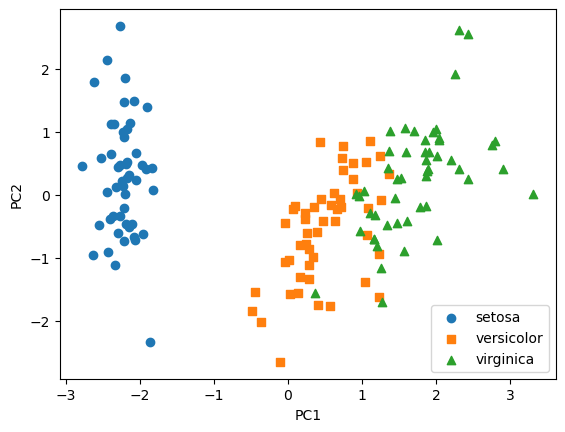

In [45]:
import matplotlib.pyplot as plt

marker = ['o', 's', '^']
for i, m in enumerate(marker):
    x_data = df_iris_pca[df_iris_pca['class'] == i]['PCA1']
    y_data = df_iris_pca[df_iris_pca['class'] == i]['PCA2']
    plt.scatter(x_data, y_data, marker=m, label=iris.target_names[i])

plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

- 꽃받침의 길이와 넓이 데이터로 시각화

In [46]:
df['class'] = iris.target

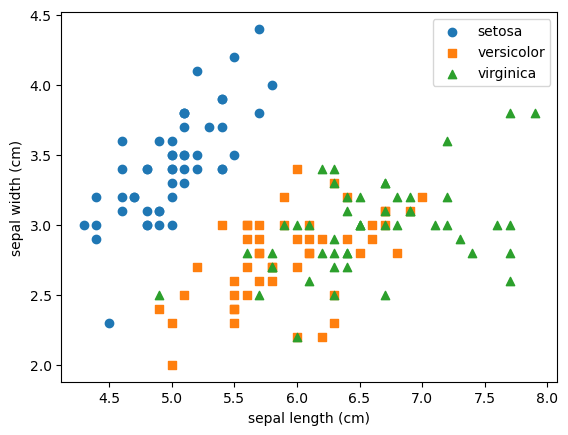

In [48]:
marker = ['o', 's', '^']
for i, m in enumerate(marker):
    x_data = df[df['class'] == i]['sepal length (cm)']
    y_data = df[df['class'] == i]['sepal width (cm)']
    plt.scatter(x_data, y_data, marker=m, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

## PCA에 따른 각 주성분이 차지하는 분산(설명력) 확인

In [51]:
print(f'분산 합계: {np.sum(pca.explained_variance_ratio_):.2f}%')

분산 합계: 0.96%


## 적절한 차원수 선택하기

In [52]:
pca = PCA()  # n_components 넣지 않으면 차원 축소하지 않음
pca.fit(iris_scaled)  # 고유값, 고유벡터값만 만들고 transform을 하지 않으면 주성분축에 데이터 내적 안함
cumsum = np.cumsum(pca.explained_variance_ratio_) # 누적 분산
# 누적 분산(설명력)이 0.95를 넘어서는 PC의 개수
d = np.argmax(cumsum >= 0.95) + 1
print(d)

2


## 주성분 수 선택을 위한 스크릿 플롯 그리기

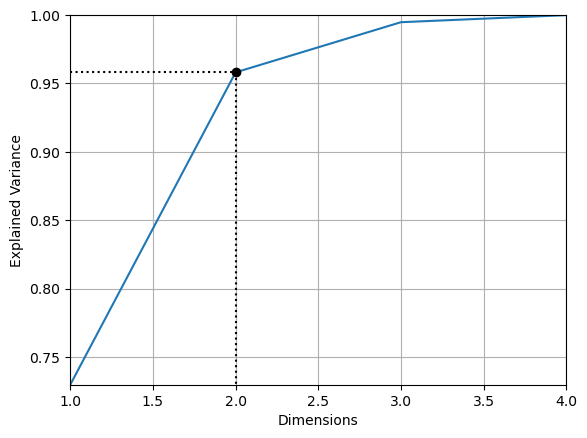

In [58]:
plt.plot(np.arange(1,5), cumsum)
plt.axis([1,4,cumsum[0],1])  # 축 범위 지정 (x축의 최소, x축의 최대, y축의 최소, y축의 최대)
plt.plot([d,d], [0, cumsum[d-1]], 'k:')  # (2,0) (2,0.95...) 두 점을 잇는 선 그리기
plt.plot([1,d], [cumsum[d-1], cumsum[d-1]], 'k:')  #(1,0.95..) (2,0.95...) 두 점을 잇는 선 그리기
plt.plot(d, cumsum[d-1], 'ko')
plt.xlabel('Dimensions')
plt.ylabel('Explained Variance')
plt.grid(True)
plt.show()

## PCA 성능 비교
- 원본 데이터와 PCA가 적용된 데이터를 이용한 분류 알고리즘 적용 결과 비교

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model1 = RandomForestClassifier(random_state=10) 
score = cross_val_score(model1, iris_scaled, iris.target, cv=3, scoring='accuracy')
print(f'교차검증 평균 정확도: {np.mean(score):.3f}')

교차검증 평균 정확도: 0.967


In [62]:
model2 = RandomForestClassifier(random_state=10) 
score = cross_val_score(model2, iris_pca, iris.target, cv=3, scoring='accuracy')
print(f'교차검증 평균 정확도: {np.mean(score):.3f}')

교차검증 평균 정확도: 0.887
